## Importing the modules needed

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.__version__

'0.24.2'

## Importing the data

In [2]:

#We can see that the dataset has data of Data,Time,Transaction and the item sold at the bakery.
df = pd.read_csv('C:/Users/PRATIK JADHAV/Desktop/DSpratik/kaggle projects/Recommendation system/BreadBasket_DMS.csv')

df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


## Transforming all item names to lower case

In [4]:
df['Item'] = df['Item'].str.lower()

## Inspecting the data

In [5]:
x = df['Item'] == "none"
print(x.value_counts())

False    20507
True       786
Name: Item, dtype: int64


This means that there rows where transaction is made but item is "none" and number of such rows are 786. which will be removed to take in consideration only those rows where transaction is made with an item.

## Droping all none values

In [6]:
df = df.drop(df[df.Item == 'none'].index)

## Checking all unique items that are sold

In [7]:
len(df['Item'].unique())

94

In [8]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam
5,2016-10-30,10:07:57,3,cookies
6,2016-10-30,10:08:41,4,muffin
7,2016-10-30,10:13:03,5,coffee
8,2016-10-30,10:13:03,5,pastry
9,2016-10-30,10:13:03,5,bread


### There are 94 different unique items sold by bakery or simply only these items are present in the Items column.

## Top 20 best selling items

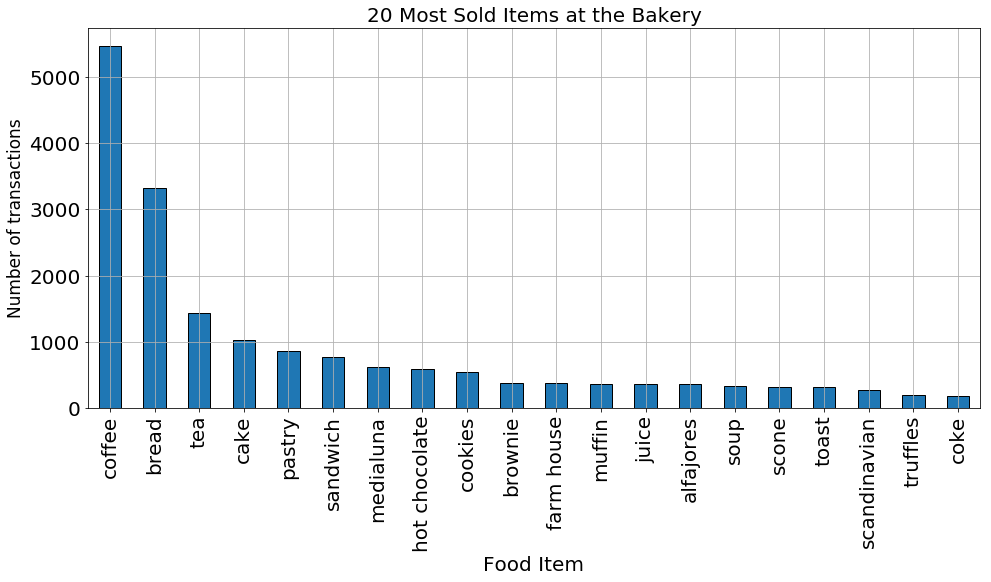

In [9]:
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

Using Datetime i created a new column called "day_of_week" which can give us insights on which weekday has more transactions

In [10]:
df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour


In [11]:
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours']]
df1.head()

,Date,Transaction,Month,Week,Weekday,Hours
0,2016-10-30,1,10,43,6,9
1,2016-10-30,2,10,43,6,10
2,2016-10-30,2,10,43,6,10
3,2016-10-30,3,10,43,6,10
4,2016-10-30,3,10,43,6,10


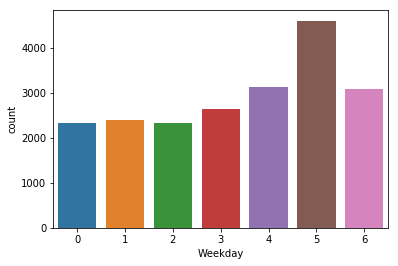

In [12]:
sns.countplot(x='Weekday',data=df1)


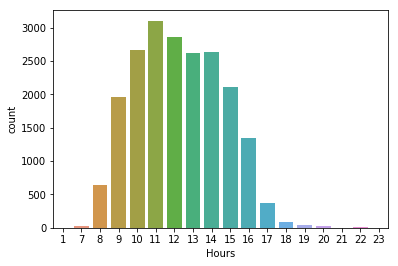

In [13]:
sns.countplot(x='Hours',data=df1)

Now, we need to run apriori algorithm to get insight that if a customer buys one item which item he/she buys next.

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [15]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [16]:
hot_encoded_df

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above lineAbove line of code is transfrom data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.


In [17]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [18]:
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

Support is an indication of how frequently the itemset appears in the dataset.

Confidence is an indication of how often the rule has been found to be true.

In [19]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
9,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


We only want to see the rules where confidence is greater than or equal to 50% so:

In [20]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(rules)
profile

In [21]:
high_association = rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]


high_association.sort_values("confidence", axis = 0, ascending = False)

,antecedents,consequents,antecedent_support,consequent_support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


For instance from the last rule we can see that toast and coffee are commonly bought together. 

This makes sense since people who purchase toast would like to have coffee with it. 

The support value for the this rule is 0.023666.

This number is calculated by dividing the number of transactions containing toast divided by total number of transactions. 

The confidence level for the rule is 0.704403 which shows that out of all the transactions that contain toast , 70.44% of the transactions also contain coffee. Finally, the lift of 1.47 tells us that coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee.